# Using fANO-GAN for predicting brain tumor

**Paweł Kruczkiewicz, Ernest Roszak, Mateusz Praski**

For AGH UST course: Machine Learning applied to Neuroimagining and Neuroscience

## Introduction

GAN is a popular machine learning framework utilized for among others the unsupervised task of image generation. The model learns the distribution of a dataset which can be then used for further research. One of usecases for using GANs in the field of neurosimagining is anomaly detection. In this work we present expeeriments with the fANO-GAN - a 2018 machine learning model for anomaly detection. We evaluate the model on the task of detecting brain tumors in MRI scans.

## How it works

[I presume that the reader is familiar with terms: GAN (and Generator and Discriminator), Autoencoder (Encoder and Decoder). If not, we can add a short description of these concepts here.]

The fANO-GAN is a mixture of two ML frameworks: GANs and Autoencoders. GAN is used to generate an image from a latent space $z$ and the encoder can transfer an image to this latent space. The training has two steps:

1. Train the GAN on a set of healthy brain images yielding a generator that based on a latent vector $z$ produces a brain MRI image. 
2. Train the autoencoder to yield an encoder that generates latent space vector $z$ based on a brain MRI image.

> **NOTE**
> 
> Authors of the work also utilize the discriminator when training the autoencoder for more realistic looking images. We followed this approach in our work.

The architecture of the fANO-GAN is presented in Fig. 1.

![Figure 1](img/fig-1.jpg)

Fig. 1. Architecture of the fANO-GAN. In our project we utilize teh $izi_f$ approach since it has been evaluated as the most accurate an precise in the original paper. Source: [1]

The anomaly is detected when the inferred image has a high anomaly score. The anomaly is the residual (that is - difference) between the input image and the image generated by the generator based on the latent vector inferred by the encoder. The anomaly score is the mean squared error between the input image and the generated image. In mathematical terms:

$$ \text{AnomalyScore}_{simple} = \frac{1}{N} \sum_{i=1}^{N} (x_i - G(E(x_i)))^2 $$

where $x_i$ is the $i$-th pixel of the inferred image, $G$ is the generator, $E$ is the encoder and $N$ is the number of pixels.

The anomaly score can be also calculated using the discriminator. The anomaly score is then enhanced by the residual of the feature map yielded from last activation layers of the discriminator. In mathematical terms:

$$ \text{AnomalyScore}_{discriminator} = \frac{1}{N_f} \sum_{i=1}^{N_f} (f(x_i) - G(E(f(x_i))))^2 $$

where $f$ is one of the last activation layers of the discriminator and $N_f$ is the number of pixels of the activation map.

Together we have the anomaly used anomaly score:

$$ \text{AnomalyScore} = \text{AnomalyScore}_{simple} + \kappa * \text{AnomalyScore}_{discriminator} $$

where $\kappa$ is a hyperparameter.

## Dataset

We have used a dataset consisting of 

[an example of healthy images]

[an example of tumor images]

## Experiments

We have trained the fANO-GAN on the dataset of healthy brain MRI scans. We have used the following hyperparameters:

- [hyperparameters]

We have trained the model for [number of epochs] epochs. The training took [time] on a [GPU/CPU] machine.


## Results


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, precision_recall_curve, auc

In [6]:
df = pd.read_csv("../your_own_dataset/results/shower_run_500_epochs/score.csv")
df

,label,img_distance,anomaly_score,z_distance
0,0,0.021174,0.032731,0.061821
1,0,0.013835,0.022864,0.060040
2,0,0.021507,0.029580,0.041370
3,0,0.022576,0.031500,0.029483
4,0,0.026903,0.044805,0.089934
...,...,...,...,...
1795,1,0.095484,0.144862,0.147885
1796,1,0.094979,0.137754,0.102114
1797,1,0.042469,0.070859,0.106696
1798,1,0.069650,0.126326,0.096078


In [7]:
training_label = 0
labels = df["label"].values
anomaly_score = df["anomaly_score"].values
img_distance = df["img_distance"].values
z_distance = df["z_distance"].values

In [8]:
fpr, tpr, _ = roc_curve(labels, img_distance)
precision, recall, _ = precision_recall_curve(labels, img_distance)
roc_auc = auc(fpr, tpr)
pr_auc =  auc(recall, precision)

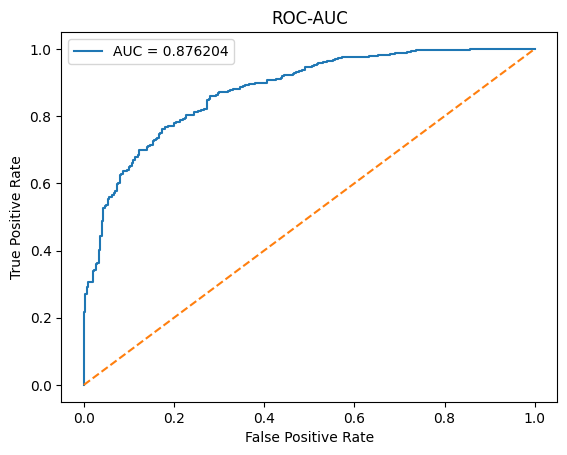

In [9]:
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title("ROC-AUC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

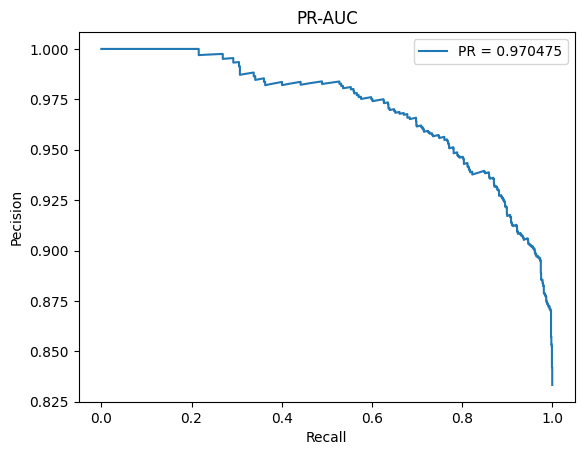

In [10]:
plt.plot(recall, precision, label=f"PR = {pr_auc:3f}")
plt.title("PR-AUC")
plt.xlabel("Recall")
plt.ylabel("Pecision")
plt.legend()
plt.show()

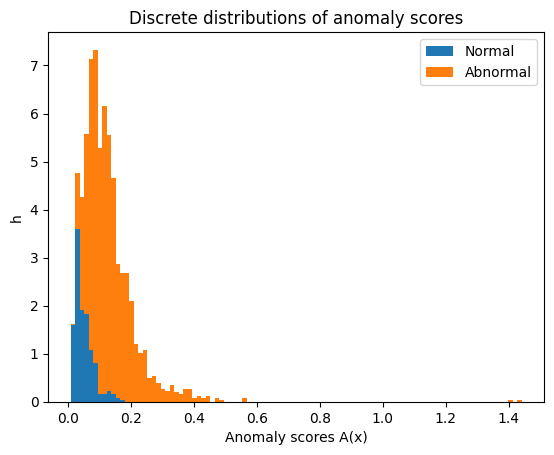

In [11]:
plt.hist([anomaly_score[labels == 0], anomaly_score[labels == 1]],
          bins=100, density=True, stacked=True,
          label=["Normal", "Abnormal"])
plt.title("Discrete distributions of anomaly scores")
plt.xlabel("Anomaly scores A(x)")
plt.ylabel("h")
plt.legend()
plt.show()

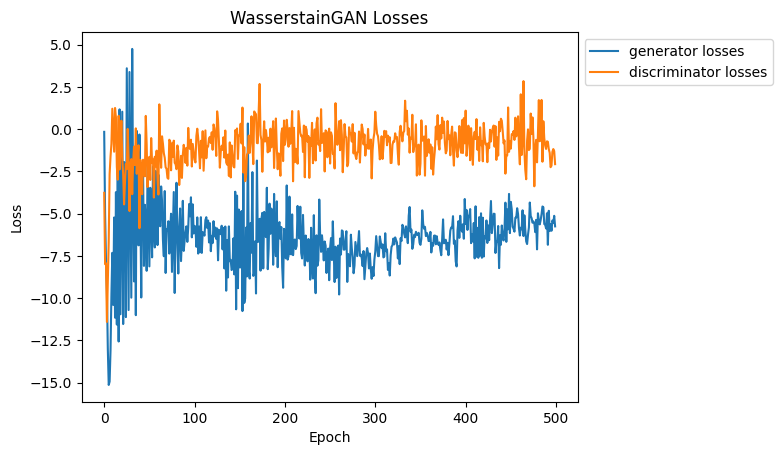

In [12]:
df = pd.read_csv("../your_own_dataset/results/shower_run_500_epochs/wgan_losses.csv")
df.plot(kind='line', xlabel='Epoch', ylabel='Loss', title='WasserstainGAN Losses')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

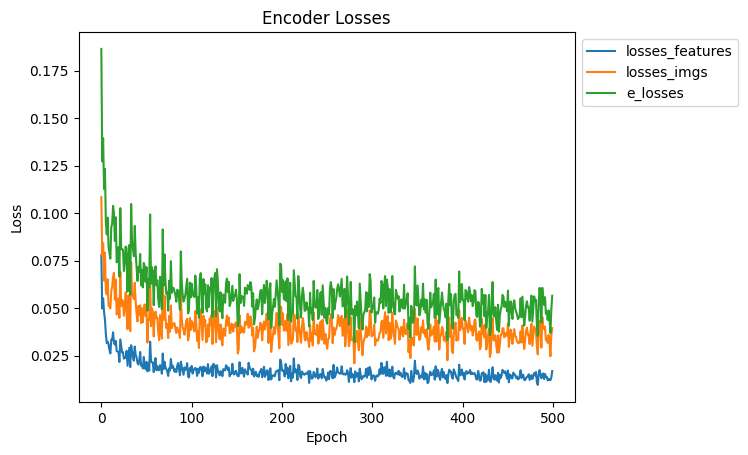

In [13]:


df = pd.read_csv("../your_own_dataset/results/shower_run_500_epochs/encoder_losses.csv")
df.plot(kind='line', xlabel='Epoch', ylabel='Loss', title='Encoder Losses')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()


## Conclusions

[...]